In [ ]:
!kaggle datasets download -d sakshisatre/tips-dataset

Dataset URL: https://www.kaggle.com/datasets/sakshisatre/tips-dataset
License(s): apache-2.0
tips-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -o /content/tips-dataset.zip

Archive:  /content/tips-dataset.zip
  inflating: tip.csv                 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_csv('tip.csv')

In [ ]:
x = df['total_bill'].values.reshape(-1,1)
y = df['tip'].values.reshape(-1,1)

In [ ]:
x_mean  = np.mean(x)
x_sd = np.std(x)

x = (x - x_mean) / x_sd

In [ ]:
x = np.column_stack((np.ones(x.shape[0]), x))

In [ ]:
beta = np.random.rand(2, 1) * 2 - 1

In [ ]:
print(x.shape)
print(beta.shape)
print(y.shape)


(244, 2)
(2, 1)
(244, 1)


In [ ]:
# print(x)
# print(y)

In [ ]:
iteration = 1000
learning_rate = 0.05
n = len(x)

for i in range(iteration):
    prediction = x.dot(beta)  # Calculate predictions
    error = prediction - y  # Calculate error
    gradient = (1 / n) * x.T.dot(error)  # Calculate gradient
    beta -= learning_rate * gradient  # Update weights

0.9330536268003363
2.9982786885245862


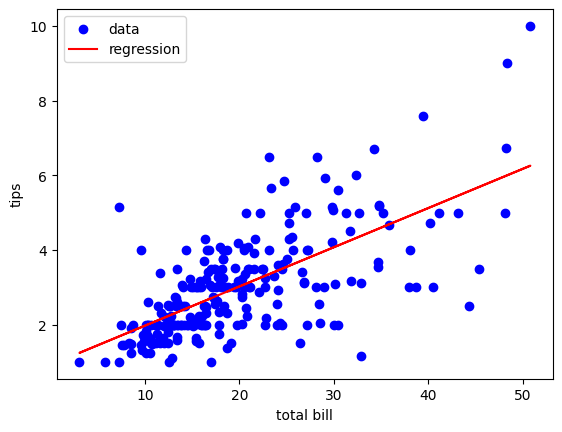

In [ ]:
slope = beta[1][0]
intercept = beta[0][0]
print(slope)
print(intercept)
plt.scatter(df['total_bill'], df['tip'], color = 'blue', label='data')
plt.plot(df['total_bill'], slope * (df['total_bill']- x_mean) / x_sd + intercept, color = 'red',label='regression')
plt.xlabel('total bill')
plt.ylabel('tips')
plt.legend()
plt.show()

Lab 7

RMS, s sqr, adj r sqr, f1 score


In [ ]:
!kaggle datasets download -d sakshisatre/tips-dataset

Dataset URL: https://www.kaggle.com/datasets/sakshisatre/tips-dataset
License(s): apache-2.0
tips-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -o /content/tips-dataset.zip

Archive:  /content/tips-dataset.zip
  inflating: tip.csv                 


Slope: 0.9503
Intercept: 3.0416
RMSE: 0.7542
MSE: 0.5688
R-squared: 0.5449
Adjusted R-squared: 0.5353


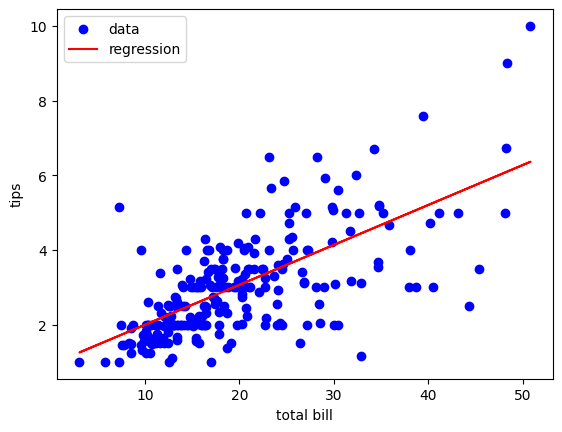

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read data
df = pd.read_csv('tip.csv')

# Define features and target
X = df['total_bill'].values.reshape(-1, 1)
y = df['tip'].values.reshape(-1, 1)

# Standardize data
x_mean = np.mean(X)
x_sd = np.std(X)
X = (X - x_mean) / x_sd

# Add bias term (column of ones)
X = np.column_stack((np.ones(X.shape[0]), X))

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model parameters
beta = np.random.rand(2, 1) * 2 - 1
iteration = 1000
learning_rate = 0.05
n = len(X_train)

# Training loop
for i in range(iteration):
    prediction = X_train.dot(beta)  # Calculate predictions on training data
    error = prediction - y_train  # Calculate error
    gradient = (1 / n) * X_train.T.dot(error)  # Calculate gradient
    beta -= learning_rate * gradient  # Update weights

# Calculate slope and intercept
slope = beta[1][0]
intercept = beta[0][0]

# Make predictions on test data
y_pred = X_test.dot(beta)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):

  mse = np.mean((y_true - y_pred) ** 2)
  return mse

mse = calculate_mse(y_test, y_pred)

# Calculate R-squared
y_mean = np.mean(y_test)
squared_residuals = (y_pred - y_test) ** 2
total_squared_errors = np.sum((y_test - y_mean) ** 2)
r_squared = 1 - (np.sum(squared_residuals) / total_squared_errors)

# Calculate Adjusted R-squared (adjusted for number of features)
n_test = len(X_test)
p = X_test.shape[1]  # number of features (including bias)
adjusted_r_squared = 1 - ((1 - r_squared) * (n_test - 1) / (n_test - p))

# Print results
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

# Plot data and regression line
plt.scatter(df['total_bill'], df['tip'], color='blue', label='data')
plt.plot(df['total_bill'], slope * (df['total_bill'] - x_mean) / x_sd + intercept, color='red', label='regression')
plt.xlabel('total bill')
plt.ylabel('tips')
plt.legend()
plt.show()